In [23]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from imblearn.over_sampling import SMOTE

In [24]:
# Step 2: Load the dataset
file_path = r'C:\Users\Shivam Bhardwaj\Desktop\asthama\asthma_disease_data.csv'
data = pd.read_csv(file_path)

In [25]:
# Drop or ignore 'DoctorInCharge' column since it's irrelevant
data.drop(columns=['DoctorInCharge'], inplace=True)
# Step 4: Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
PatientID                 0
Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
dtype: int64


In [26]:
# Step 5: Handle missing values (example: fill missing BMI with the mean)
data['BMI'].fillna(data['BMI'].mean(), inplace=True)

# Step 6: Convert categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=['Ethnicity', 'EducationLevel'], drop_first=True)

# Step 7: Check the data after encoding
print(data.head())

   PatientID  Age  Gender        BMI  Smoking  PhysicalActivity  DietQuality  \
0       5034   63       0  15.848744        0          0.894448     5.488696   
1       5035   26       1  22.757042        0          5.897329     6.341014   
2       5036   57       0  18.395396        0          6.739367     9.196237   
3       5037   40       1  38.515278        0          1.404503     5.826532   
4       5038   61       0  19.283802        0          4.604493     3.127048   

   SleepQuality  PollutionExposure  PollenExposure  ...  Coughing  \
0      8.701003           7.388481        2.855578  ...         0   
1      5.153966           1.969838        7.457665  ...         1   
2      6.840647           1.460593        1.448189  ...         0   
3      4.253036           0.581905        7.571845  ...         1   
4      9.625799           0.980875        3.049807  ...         0   

   NighttimeSymptoms  ExerciseInduced  Diagnosis  Ethnicity_1  Ethnicity_2  \
0                  0      

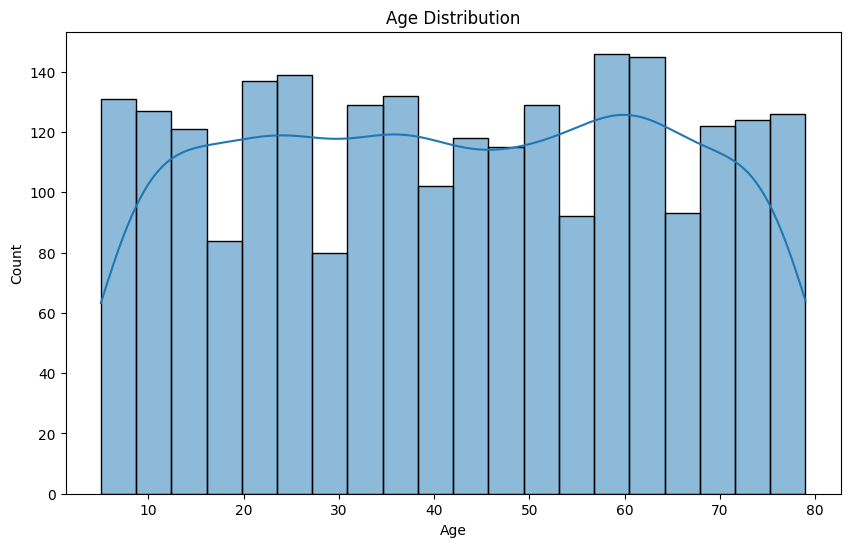

In [27]:
# Step 8: Visualize distributions of numerical features
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

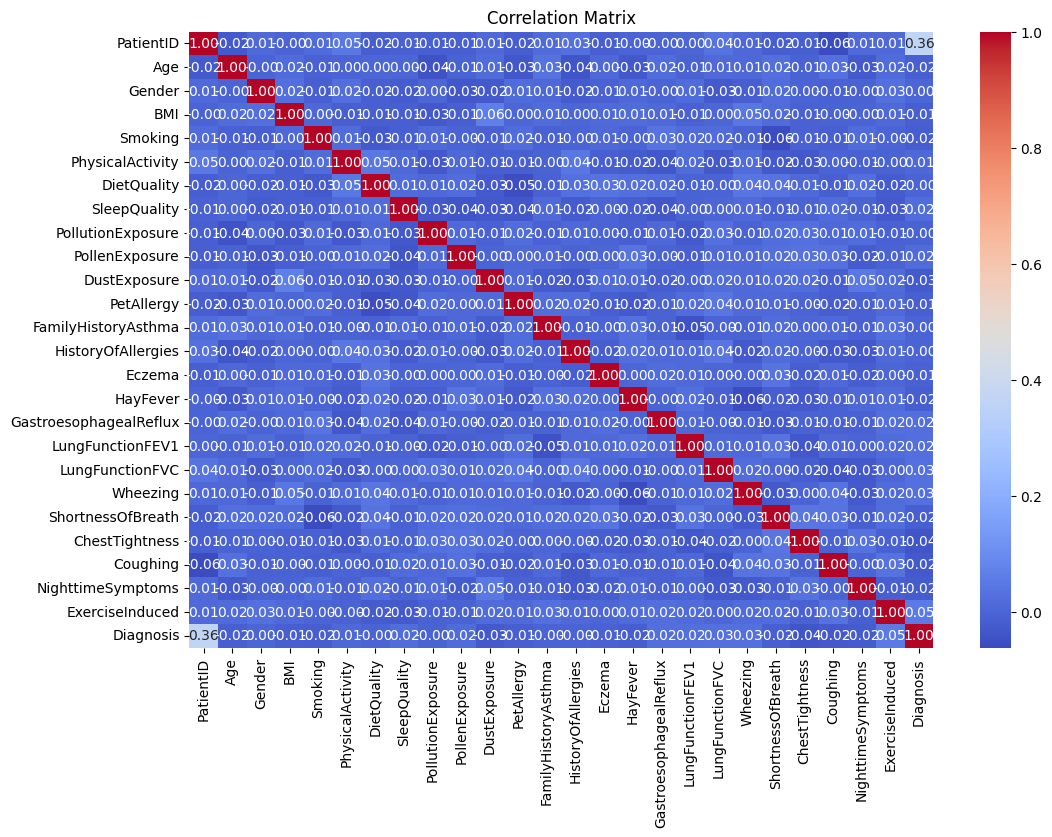

In [28]:

# Step 9: Check correlations
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [49]:
from sklearn.model_selection import train_test_split

# Assume 'Diagnosis' is the target column
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
# Step 13: Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search model to the training data (before resampling)
grid_search.fit(X_train_res, y_train_res)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Step 14: Train the Random Forest Model Using the Best Parameters on Resampled Data
best_model.fit(X_train_res, y_train_res)


RandomForestClassifier(max_depth=20, random_state=42)

In [52]:
# Step 15: Evaluate the model on the test set
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.941544885177453
Precision: 0.42857142857142855
Recall: 0.6521739130434783
F1 Score: 0.5172413793103448

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       456
           1       0.43      0.65      0.52        23

    accuracy                           0.94       479
   macro avg       0.71      0.80      0.74       479
weighted avg       0.96      0.94      0.95       479



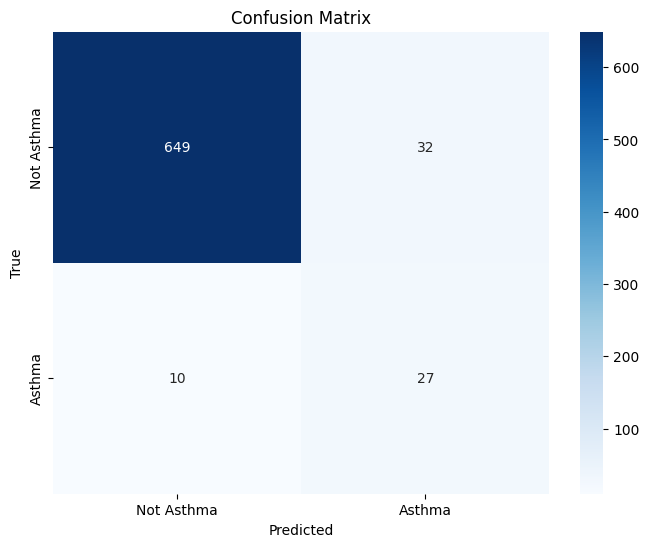

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Asthma', 'Asthma'], yticklabels=['Not Asthma', 'Asthma'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [46]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cross_val_scores = cross_val_score(best_model, X_train_res, y_train_res, cv=5)
print("Cross-validated scores:", cross_val_scores)
print("Mean accuracy from cross-validation:", cross_val_scores.mean())


Cross-validated scores: [0.96692913 0.98582677 0.99055118 0.97952756 0.97318612]
Mean accuracy from cross-validation: 0.9792041531086217


In [47]:
# Step 18: Save the trained model and feature columns
joblib.dump(best_model, 'respiratory_disease_model.pkl')
joblib.dump(list(X.columns), 'feature_columns.pkl')  # Save the list of feature columns used during training

print("Model and feature columns saved successfully.")

Model and feature columns saved successfully.


In [40]:
# Example snippet from your training code
import pandas as pd

# Load the training data
train_data = pd.read_csv('asthma_disease_data.csv')

# Print the columns to see what features were used
print(train_data.columns)


Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'PollutionExposure', 'PollenExposure', 'DustExposure', 'PetAllergy',
       'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever',
       'GastroesophagealReflux', 'LungFunctionFEV1', 'LungFunctionFVC',
       'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing',
       'NighttimeSymptoms', 'ExerciseInduced', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')
